In [18]:
import subprocess
import os
import time
import numpy as np
import pandas as pd
import openpyxl
import datetime
import hydroeval as he
from configparser import ConfigParser
import matplotlib.pyplot as plt

In [3]:
#Import paths
obs_path = r"P:\Projects\Olivares\Streamflow\qobs_2000.csv"
sim_path = r"C:\Users\pauls\Anaconda3\pkgs\sphy-2.2.1-py_0\site-packages\SPHY\Olivares\output\QTOTSubBasinTSS.tss"
    
#Read and prepare obs streamflow
obs = pd.read_csv(obs_path)
obs = obs.iloc[:,1]

#Read and prepare sim streamflow
sim_read = pd.read_csv(sim_path,index_col=False,skiprows=4)
sim = []
    
for v in range(len(sim_read)):
    val = sim_read.iloc[v,0].strip()
    val = " ".join(val.split())
    sim.append(val)

sim = pd.DataFrame(sim)
sim.columns = ["name"]
sim = sim["name"].str.split(" ",expand=True)
sim = pd.DataFrame(sim.iloc[:,2]).astype(float)
sim = sim.iloc[:,0]

#Calculate KGE'
kge = pd.DataFrame(he.evaluator(he.kgeprime, sim, obs),index=["KGE","r","γ","β"])
nash = pd.DataFrame(he.evaluator(he.nse, sim, obs),index=["NASH"])
#array.append(kge)
#array.append(nash)
print(kge)
print(nash)

            0
KGE  0.230669
r    0.372684
γ    1.356914
β    0.733623
             0
NASH -0.280189


In [10]:
kge[0][3]

0.7336228892958363

In [12]:
nash[0][0]

-0.28018921605586833

In [25]:
kge2 = []
kge2.append(kge[0][0])

In [26]:
kge2.append(0.55)
kge2.append(0.1)
kge2.append(0.05)

In [27]:
kge2 = pd.DataFrame(kge2)
kge2

,0
0,0.230669
1,0.550000
2,0.100000
3,0.050000


<AxesSubplot:>

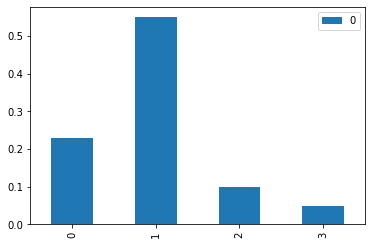

In [30]:
kge2.plot(kind="bar")